In [2]:
import json
import pprint
import collections
import requests
import pandas as pd
import numpy as np
import gensim

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import preprocessing
from matplotlib import pyplot as plt

import logging
logging.basicConfig(format='%(levelname)s : %(message)s', level=logging.INFO)
logging.root.level = logging.INFO  # ipython sometimes messes up the logging setup; restore

In [12]:
all_data = pd.read_csv('data/sequence-data/1000-trial-terminals-1.csv', index_col=0)

In [34]:
all_data = all_data.fillna('')

In [35]:
all_blocks = []
for col in all_data:
    blocks = all_data[col].unique()
    all_blocks.extend(blocks)
block_vocab = list(set(all_blocks))

In [69]:
all_block_docs = all_data.values.tolist()

In [37]:
samp = all_block_docs[:10]

# RNN

In [38]:
from numpy import array
from numpy import cumsum
import tensorflow as tf

# Word2Vec trial

In [39]:
# Global hyper parameters
hp = {
    "size": 150, # size of the one-hot-encoded word vectors
    "window": 3, # context size
    "min_count": 2,
    "workers": 4,
    "iter": 10
}

In [40]:
model = gensim.models.Word2Vec(
        all_block_docs,
        size=hp["size"],
        window=hp["window"],
        min_count=hp["min_count"],
        workers=hp["workers"])

INFO : collecting all words and their counts
INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO : PROGRESS: at sentence #10000, processed 330000 words, keeping 110 word types
INFO : PROGRESS: at sentence #20000, processed 660000 words, keeping 115 word types
INFO : PROGRESS: at sentence #30000, processed 990000 words, keeping 118 word types
INFO : PROGRESS: at sentence #40000, processed 1320000 words, keeping 120 word types
INFO : PROGRESS: at sentence #50000, processed 1650000 words, keeping 125 word types
INFO : PROGRESS: at sentence #60000, processed 1980000 words, keeping 126 word types
INFO : PROGRESS: at sentence #70000, processed 2310000 words, keeping 126 word types
INFO : PROGRESS: at sentence #80000, processed 2640000 words, keeping 134 word types
INFO : PROGRESS: at sentence #90000, processed 2970000 words, keeping 135 word types
INFO : PROGRESS: at sentence #100000, processed 3300000 words, keeping 136 word types
INFO : collected 136 word types fr

In [41]:
model.train(all_block_docs, total_examples=len(all_block_docs), epochs=50)

INFO : training model with 4 workers on 129 vocabulary and 150 features, using sg=0 hs=0 sample=0.001 negative=5 window=3
INFO : worker thread finished; awaiting finish of 3 more threads
INFO : worker thread finished; awaiting finish of 2 more threads
INFO : worker thread finished; awaiting finish of 1 more threads
INFO : worker thread finished; awaiting finish of 0 more threads
INFO : EPOCH - 1 : training on 3559545 raw words (557937 effective words) took 0.4s, 1283100 effective words/s
INFO : worker thread finished; awaiting finish of 3 more threads
INFO : worker thread finished; awaiting finish of 2 more threads
INFO : worker thread finished; awaiting finish of 1 more threads
INFO : worker thread finished; awaiting finish of 0 more threads
INFO : EPOCH - 2 : training on 3559545 raw words (558342 effective words) took 0.4s, 1358146 effective words/s
INFO : worker thread finished; awaiting finish of 3 more threads
INFO : worker thread finished; awaiting finish of 2 more threads
INFO :

(27914268, 177977250)

In [44]:
def find_similar_to(word):
    return [w for w in model.wv.most_similar(positive=[word])]

In [68]:
find_similar_to('event_broadcast')

[('event_broadcastandwait', 0.610576868057251),
 ('sound_play', 0.5976538062095642),
 ('control_stop', 0.5775161385536194),
 ('control_wait', 0.5335881114006042),
 ('motion_glidesecstoxy', 0.5199693441390991),
 ('looks_switchbackdropto', 0.5009836554527283),
 ('looks_sayforsecs', 0.48168259859085083),
 ('sound_stopallsounds', 0.4631023108959198),
 ('control_wait_until', 0.4614053964614868),
 ('event_whenthisspriteclicked', 0.46072977781295776)]

In [51]:
X = model[model.wv.vocab]

/Users/tylerangert/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [72]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

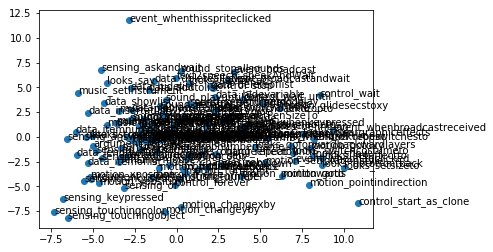

<Figure size 640x480 with 0 Axes>

In [80]:
plt.scatter(result[:, 0], result[:, 1])

words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    
plt.figure(figsize=(8, 6), dpi= 80, facecolor='w', edgecolor='k')
fig.savefig('test2png.png', dpi=100)
plt.show()

In [81]:
list(model.wv.vocab.keys())

['event_whenflagclicked',
 '_',
 'data_setvariableto',
 'looks_hide',
 '',
 'event_whenkeypressed',
 'motion_pointindirection',
 'motion_movesteps',
 'looks_switchcostumeto',
 'motion_gotoxy',
 'looks_show',
 'control_forever',
 '>',
 'control_if',
 'sensing_touchingobject',
 'looks_sayforsecs',
 'data_changevariableby',
 'looks_switchbackdropto',
 'event_whenbackdropswitchesto',
 'motion_glidesecstoxy',
 'motion_turnright',
 'data_showvariable',
 'data_hidevariable',
 'control_stop',
 'control_repeat_until',
 'control_wait',
 'control_repeat',
 'control_wait_until',
 'event_whenthisspriteclicked',
 'sensing_askandwait',
 'procedures_call',
 'sensing_answer',
 'procedures_definition',
 'data_addtolist',
 'data_deleteoflist',
 'data_itemoflist',
 'data_deletealloflist',
 'control_if_else',
 'event_whenbroadcastreceived',
 'looks_nextcostume',
 'event_broadcast',
 'looks_gotofrontback',
 'motion_goto',
 'motion_sety',
 'looks_seteffectto',
 'control_create_clone_of',
 'control_start_as_c

In [82]:
result = model.most_similar(positive=['looks_sayforsecs', 'sound_playuntildone'], negative=['looks_say'], topn=1)

/Users/tylerangert/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [58]:
result

[('looks_switchbackdropto', 0.49344438314437866)]